# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [97]:
import pandas as pd

## imports for Python, Pandas

In [98]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [99]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [100]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [101]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [102]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [103]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


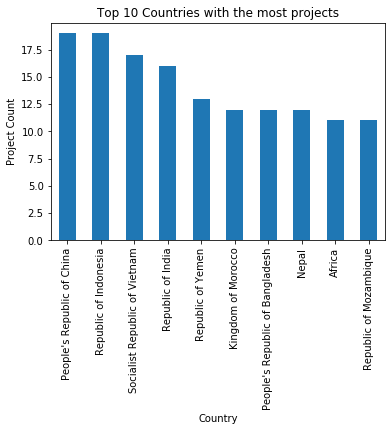

In [104]:
# 1. Find the 10 countries with most projects

#This cell imports the necessary librairies and reads in the json file. Once read, a series containing the
#value count of projects for each country is stored in the variable x. The top 10 countries are picked out 
#and stored in show_case using the .head() method with 10 as the argument. The bar graph is generated using show_case
#and printed out at the end


import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_json('data/world_bank_projects.json')


x = df['countryname'].value_counts()


show_case = x.head(10)
print(show_case)

#Generate bar graph 
show_case.plot(kind = 'bar')
plt.title('Top 10 Countries with the most projects')
plt.xlabel('Country')
plt.ylabel('Project Count')



plt.show()

Text(0, 0.5, 'Occurence')

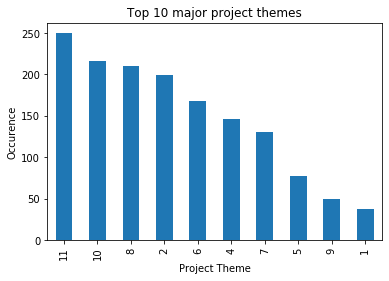

In [248]:
# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt

df = json.load(open('data/world_bank_projects.json'))
y = json_normalize(df, 'mjtheme_namecode')

#use the code column since some of the name values are missing. Code column will return all occurences 
x= y.code.value_counts().head(10)

x.plot(kind = 'bar')
plt.title('Top 10 major project themes')
plt.xlabel('Project Theme')
plt.ylabel('Occurence')

In [246]:
#In 2. above you will notice that some entries have only the code and the name is missing.
#Create a dataframe with the missing names filled in.

import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import the json file, normalize it to extract the code and name columns. store it into df
filein = json.load(open('data/world_bank_projects.json'))
df = json_normalize(filein, 'mjtheme_namecode')

#quick check to see that there are indeed blank names in the column
print(df.name[10:40])

#separate the codes and names of df
codes = df.code
names = df.name

#create a Pandas series
codesdf = pd.Series(codes)
namesdf = pd.Series(names)

#create a new dataframe, concat by column
newdf = pd.concat([codesdf, namesdf], axis = 1)


#remove rows with a blank name and remove duplicates
newdf = newdf.replace('',np.nan).dropna()

newdf = pd.DataFrame(newdf)

themesdf = newdf.drop_duplicates().reset_index()

#set the index to the codes. this will make it easier to access the themes in the for loop below
themesdf = themesdf.set_index(themesdf.code)

#Iterate over the rows in the y.name dataframe. if the name is blank, replace it with the appropriate name in themesdf
#using the code as the index.

for idx, row in df.iterrows():
    if row['name'] == '':
        df.name[idx] = themesdf.name[row['code']]


        
#check to see if the blank names have been replaced
print(df.name[10:40])

10                           Trade and integration
11        Financial and private sector development
12           Social protection and risk management
13                                                
14                        Public sector governance
15        Financial and private sector development
16    Environment and natural resources management
17                                                
18                               Rural development
19                                                
20                        Public sector governance
21                        Public sector governance
22                        Public sector governance
23                               Rural development
24                                                
25                               Rural development
26           Social protection and risk management
27           Social protection and risk management
28    Environment and natural resources management
29                             